In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'C:\D\Python_25Sep21\M6_dataset\983_m6_datasets_v1.0\BigMartSalesData.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


<AxesSubplot:xlabel='Month'>

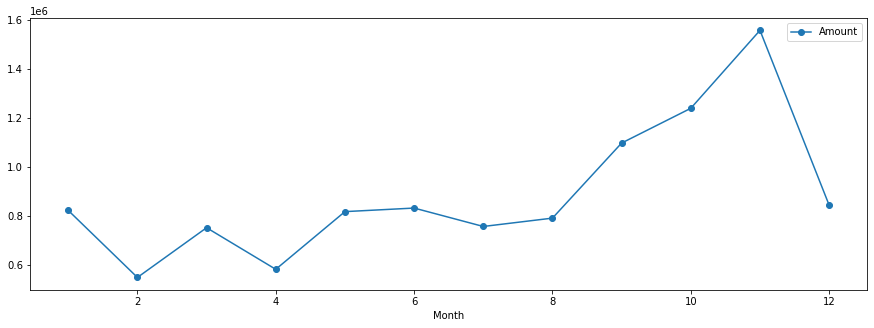

In [18]:
#1. Plot Total Sales Per Month for Year 2011. How the total sales have increased over months in Year 2011. Which month has lowest Sales?

pd.DataFrame(df[df['Year']==2011].groupby('Month').sum()['Amount']).plot(figsize=(15,5), marker='o')

In [16]:
# There is a steady increase by the second half of the year.
# Highest sales - November
# Lowest sales - February

<AxesSubplot:xlabel='Month'>

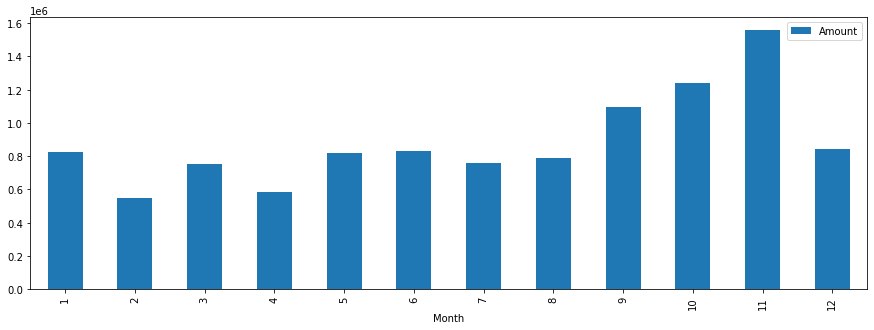

In [19]:
# 2. Plot Total Sales Per Month for Year 2011 as Bar Chart. Is Bar Chart Better to visualize than Simple Plot?

pd.DataFrame(df[df['Year']==2011].groupby('Month').sum()['Amount']).plot(kind='bar', figsize=(15,5))

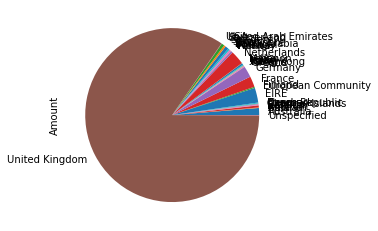

In [28]:
# 3. Plot Pie Chart for Year 2011 Country Wise. Which Country contributes highest towards sales?

import matplotlib.pyplot as plt
pd.DataFrame(df[df['Year']==2011].groupby('Country').sum()['Amount']).astype(int).plot(kind='pie', y='Amount', legend=False)
plt.show()

In [ ]:
# United Kingdom has the highest sales contribution for year-2011

In [25]:
pd.DataFrame(df[df['Year']==2011].groupby('Country').sum()['Amount']).astype(int)

,Amount
Country,
Australia,138904
Austria,9945
Bahrain,754
Belgium,39671
Brazil,1143
Canada,3666
Channel Islands,20451
Cyprus,12643
Czech Republic,945


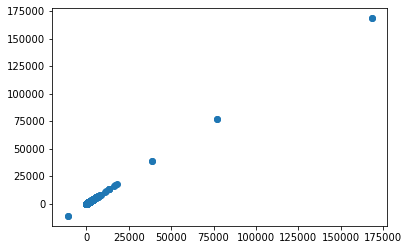

In [29]:
# 4. Plot Scatter Plot for the invoice amounts and see the concentration of amount. In which range most of the invoice amounts are concentrated

plt.scatter(x=df['Amount'], y=df['Amount'])

In [30]:
# more invoice amount are present in less than 25000 range

In [52]:
# You can try these enhancements in code
# 1. Change the bar chart to show the value of bar

month_summary = pd.DataFrame(df[df['Year']==2011].groupby('Month').sum()['Amount']).reset_index()
month_summary['Amount'] = month_summary['Amount'].apply(lambda x:round(x,1))
month_summary

,Month,Amount
0,1,822669.6
1,2,549134.5
2,3,752003.3
3,4,582318.5
4,5,817655.2
5,6,832231.7
6,7,757108.9
7,8,791173.0
8,9,1097467.7
9,10,1239237.3


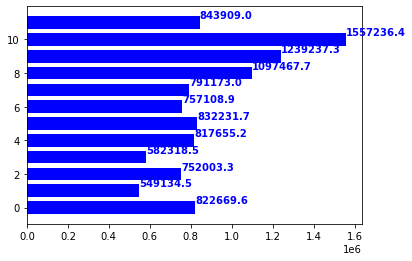

In [53]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(month_summary['Amount']))  # the x locations for the groups
ax.barh(ind, month_summary['Amount'], width, color="blue")

for i, v in enumerate(month_summary['Amount']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

In [54]:
country_df = pd.DataFrame(df[df['Year']==2011].groupby('Country').sum()['Amount']).astype(int)
country_df

,Amount
Country,
Australia,138904
Austria,9945
Bahrain,754
Belgium,39671
Brazil,1143
Canada,3666
Channel Islands,20451
Cyprus,12643
Czech Republic,945


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

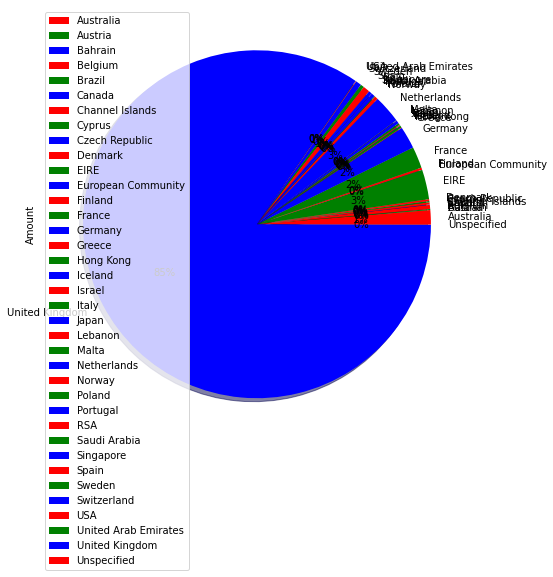

In [60]:
# 2. In Pie Chart Play With Parameters shadow=True, startangle=90 and see how different the chart looks

country_df.plot(kind='pie', 
            labels=country_df.index, 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%',
            fontsize=10, 
            subplots='true',
            figsize=(10,8),
               shadow=True)

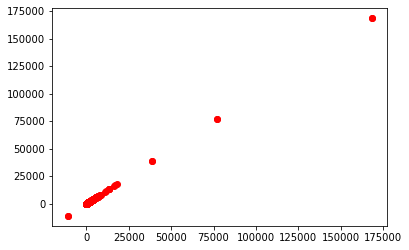

In [61]:
#  3. In scatter plot change the color of Scatter Points

plt.scatter(x=df['Amount'], y=df['Amount'], c='r')